In [110]:
import torch
from torchvision import datasets, transforms
import helper
from collections import OrderedDict
from torch import nn
import torch.nn.functional as F
from torch import optim

In [111]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [112]:
image,label = next(iter(trainloader))

In [113]:
images.shape

torch.Size([64, 1, 28, 28])

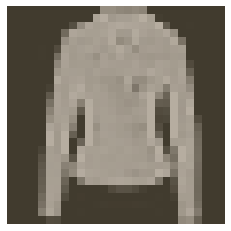

In [42]:

helper.imshow(image[5,:]);


In [77]:
#Define network architicure 
network = nn.Sequential(OrderedDict([
                                    ('hidden1',nn.Linear(784, 256)), 
                                    ('relu_1', nn.ReLU()),
                                    ('hidden2',nn.Linear(256,128)),
                                     ('relu_2',nn.ReLU()),
                                    ('hidden3',nn.Linear(128,64)),
                                     ('relu_3',nn.ReLU()),
                                    ('output',nn.Linear(64,10)),
                                     ('softmax', nn.LogSoftmax(dim=1))]))


In [58]:
network = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

In [78]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(network.parameters(),lr=0.001)

In [79]:
epoch=6
for i in range(epoch):
    sumloss=0
    for images, labels in trainloader:
        images= images.view(images.shape[0],-1)
        optimizer.zero_grad()
        out= network(images)
        loss = criterion(out,labels)
        loss.backward()
        optimizer.step()
        sumloss+=loss.item()
    else:
        print("loss: ",sumloss/len(trainloader) )
        
        
        
    
    

loss:  0.5127267210500073
loss:  0.3751904752208734
loss:  0.33645838344179746
loss:  0.3101986176582542
loss:  0.2941242045859919
loss:  0.2764130454264216


In [61]:
criterion = nn.NLLLoss()
optimizer = optim.SGD(network.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # TODO: Training pass
        optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
        output = network(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.3297379541752943
Training loss: 0.7536156434240118
Training loss: 0.6383755083150192
Training loss: 0.5849258073293833
Training loss: 0.5492475772463182


label:  tensor([0, 6, 1, 5, 7, 0, 3, 9, 3, 2, 1, 0, 9, 0, 1, 6, 9, 6, 9, 7, 8, 0, 5, 9,
        4, 9, 7, 9, 9, 1, 0, 1, 0, 2, 4, 5, 3, 2, 5, 1, 6, 4, 8, 6, 4, 0, 0, 8,
        9, 5, 1, 0, 4, 2, 2, 2, 1, 6, 7, 6, 7, 3, 9, 0])
prediction :  tensor(0)
tensor(True)


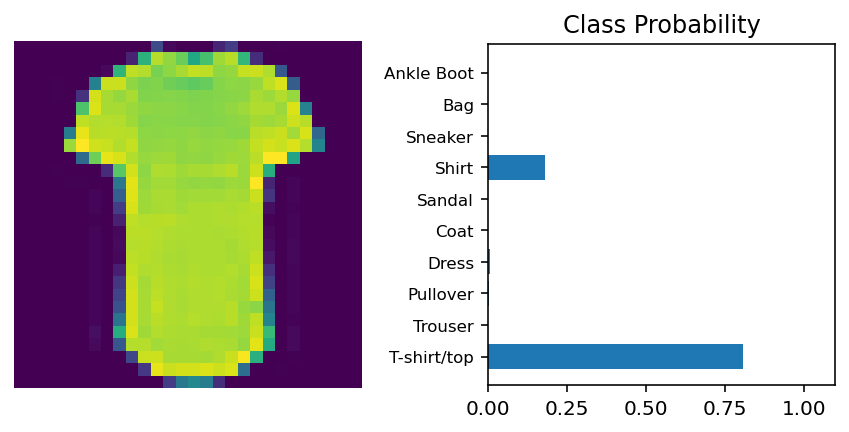

In [109]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)
print("label: ",labels)
print("prediction : ",torch.argmax(torch.exp(network(img))))
print(torch.argmax(torch.exp(network(img)))==(labels[0]))
# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(network(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [108]:
counter=0
correct=0
for images,labels in testloader:
    for i in range(images.shape[0]):
        counter+=1
        img = images[i]
        img = img.resize_(1, 784)
        p= torch.exp(network(img))
        if(torch.argmax(p)==(labels[i])):
            correct+=1
    print("correcr:{}, all{},percent{} ".format(correct,counter,correct/counter *100))
            
        
        
    
    

correcr:54, all64,percent84.375 
correcr:112, all128,percent87.5 
correcr:164, all192,percent85.41666666666666 
correcr:220, all256,percent85.9375 
correcr:278, all320,percent86.875 
correcr:330, all384,percent85.9375 
correcr:390, all448,percent87.05357142857143 
correcr:442, all512,percent86.328125 
correcr:499, all576,percent86.63194444444444 
correcr:556, all640,percent86.875 
correcr:611, all704,percent86.78977272727273 
correcr:666, all768,percent86.71875 
correcr:726, all832,percent87.25961538461539 
correcr:784, all896,percent87.5 
correcr:842, all960,percent87.70833333333333 
correcr:895, all1024,percent87.40234375 
correcr:950, all1088,percent87.31617647058823 
correcr:1012, all1152,percent87.84722222222221 
correcr:1064, all1216,percent87.5 
correcr:1123, all1280,percent87.734375 
correcr:1174, all1344,percent87.35119047619048 
correcr:1232, all1408,percent87.5 
correcr:1292, all1472,percent87.77173913043478 
correcr:1347, all1536,percent87.6953125 
correcr:1405, all1600,per